# LA Restaurants | Risk Prediction

In [1]:
import os

In [2]:
os.getcwd()

'C:\\Py37\\py37'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'ml_la_restaurants_risk_prediction_1.ipynb',
 'restaurant-and-market-health-inspections.7z',
 'restaurant-and-market-health-inspections.csv',
 'restaurant-and-market-health-violations.7z',
 'restaurant-and-market-health-violations.csv',
 'socrata_metadata_restaurant-and-market-health-inspections.json',
 'socrata_metadata_restaurant-and-market-health-violations.json']

In [4]:
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# !pip install xgboost

In [6]:
sys.getsizeof('restaurant-and-market-health-violations.csv')

68

In [7]:
df = pd.read_csv('restaurant-and-market-health-violations.csv',)

In [8]:
df.empty

False

In [9]:
df.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,2018-03-30T00:00:00,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029


In [10]:
df.describe()

,points,program_element_pe,score,service_code
count,272801.000000,272801.000000,272801.000000,272801.000000
mean,1.327539,1630.387946,91.466186,7.920796
std,0.810236,8.799336,4.479845,52.157750
min,0.000000,1610.000000,64.000000,1.000000
25%,1.000000,1631.000000,90.000000,1.000000
50%,1.000000,1632.000000,92.000000,1.000000
75%,1.000000,1635.000000,94.000000,1.000000
max,11.000000,1641.000000,100.000000,401.000000


In [11]:
df.describe(include='all')

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
count,272801,272801,272801,272801,272801,272801,272801.000000,272801,272801,272801,...,272801,272801,272801.000000,272174,272801,272801,272801.000000,272801.000000,272801,272801
unique,53497,700,11382,70,66,3,NaN,3,11320,1,...,10881,18,NaN,12123,2,13675,NaN,NaN,2,272801
top,DAABC7FCZ,2016-03-07T00:00:00,DODGER STADIUM,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,NaN,A,1000 VIN SCULLY AVE,LOS ANGELES,...,RALPHS GROCERY COMPANY,RESTAURANT (0-30) SEATS HIGH RISK,NaN,RESTAURANT,ACTIVE,PR0170854,NaN,NaN,ROUTINE INSPECTION,DAM170361F036
freq,24,1017,981,30289,30289,272799,NaN,234707,989,272801,...,1481,69820,NaN,462,238747,125,NaN,NaN,268081,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.327539,NaN,NaN,NaN,...,NaN,NaN,1630.387946,NaN,NaN,NaN,91.466186,7.920796,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,0.810236,NaN,NaN,NaN,...,NaN,NaN,8.799336,NaN,NaN,NaN,4.479845,52.157750,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,1610.000000,NaN,NaN,NaN,64.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,1631.000000,NaN,NaN,NaN,90.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,1632.000000,NaN,NaN,NaN,92.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,1635.000000,NaN,NaN,NaN,94.000000,1.000000,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272801 entries, 0 to 272800
Data columns (total 25 columns):
serial_number            272801 non-null object
activity_date            272801 non-null object
facility_name            272801 non-null object
violation_code           272801 non-null object
violation_description    272801 non-null object
violation_status         272801 non-null object
points                   272801 non-null int64
grade                    272801 non-null object
facility_address         272801 non-null object
facility_city            272801 non-null object
facility_id              272801 non-null object
facility_state           272801 non-null object
facility_zip             272801 non-null object
employee_id              272801 non-null object
owner_id                 272801 non-null object
owner_name               272801 non-null object
pe_description           272801 non-null object
program_element_pe       272801 non-null int64
program_name             27

In [13]:
df.dtypes

serial_number            object
activity_date            object
facility_name            object
violation_code           object
violation_description    object
violation_status         object
points                    int64
grade                    object
facility_address         object
facility_city            object
facility_id              object
facility_state           object
facility_zip             object
employee_id              object
owner_id                 object
owner_name               object
pe_description           object
program_element_pe        int64
program_name             object
program_status           object
record_id                object
score                     int64
service_code              int64
service_description      object
row_id                   object
dtype: object

In [14]:
len(df)

272801

#### Serial Number

In [15]:
df['serial_number'].describe()

count        272801
unique        53497
top       DAABC7FCZ
freq             24
Name: serial_number, dtype: object

#### Activity Date

##### convert activity_date to datetime

In [16]:
df['activity_date'] = pd.to_datetime(df['activity_date'])

In [17]:
df['activity_date'].dtype

dtype('<M8[ns]')

In [18]:
df.dtypes

serial_number                    object
activity_date            datetime64[ns]
facility_name                    object
violation_code                   object
violation_description            object
violation_status                 object
points                            int64
grade                            object
facility_address                 object
facility_city                    object
facility_id                      object
facility_state                   object
facility_zip                     object
employee_id                      object
owner_id                         object
owner_name                       object
pe_description                   object
program_element_pe                int64
program_name                     object
program_status                   object
record_id                        object
score                             int64
service_code                      int64
service_description              object
row_id                           object


#### Facility Name

In [19]:
df['facility_name'].describe()

count             272801
unique             11382
top       DODGER STADIUM
freq                 981
Name: facility_name, dtype: object

#### Violation Code

In [20]:
df['violation_code'].describe()

count     272801
unique        70
top         F044
freq       30289
Name: violation_code, dtype: object

In [21]:
df['violation_code'].unique()

array(['F030', 'F027', 'F035', 'F033', 'F029', 'F044', 'F006', 'F039',
       'F037', 'F032', 'F034', 'F014', 'F043', 'F042', 'F009', 'F007',
       'F036', 'F038', 'F048', 'F040', 'F049', 'F046', 'F023', 'F055',
       'F013', 'F025', 'F053', 'F041', 'F052', 'F054', 'F024', 'F026',
       'F028', 'F050', 'F008', 'F016', 'F058', 'F005', 'F045', 'F004',
       'F047', 'F011', 'F022', 'F051', 'F015', 'F031', 'F057', 'F021',
       'W019', 'W044', 'W023', 'F002', 'F012', 'F056', 'W032', 'F003',
       'F017', 'H102', 'F001', 'F019', 'F018', 'W021', 'F010', 'W005',
       'W027', 'W052', 'W051', 'W004', 'W034', 'W028'], dtype=object)

#### Violation Description

In [22]:
df['violation_description'].describe()

count                                                272801
unique                                                   66
top       # 44. Floors, walls and ceilings: properly bui...
freq                                                  30289
Name: violation_description, dtype: object

In [23]:
df['violation_description'].unique()

array(['# 30. Food properly stored; food storage containers identified',
       '# 27. Food separated and protected',
       '# 35. Equipment/Utensils - approved; installed; clean; good repair, capacity',
       '# 33. Nonfood-contact surfaces clean and in good repair',
       '# 29. Toxic substances properly identified, stored, used',
       '# 44. Floors, walls and ceilings: properly built, maintained in good repair and clean',
       '# 06. Adequate handwashing facilities supplied & accessible',
       '# 39. Wiping cloths: properly used and stored',
       '# 37. Adequate ventilation and lighting; designated areas, use',
       '# 32. Food properly labeled & honestly presented',
       '# 34. Warewashing facilities: Adequate, maintained, properly use, test strips available',
       '# 14. Food contact surfaces: clean and sanitized',
       '# 43. Premises; personal/cleaning items; vermin-proofing',
       '# 42. Toilet facilities: properly constructed, supplied, cleaned',
       '#

#### Violation Status

In [24]:
df['violation_status'].describe()

count                272801
unique                    3
top       OUT OF COMPLIANCE
freq                 272799
Name: violation_status, dtype: object

In [25]:
df['violation_status'].unique()

array(['OUT OF COMPLIANCE', 'VIOLATION', 'HOUSING NON-CRITICAL'],
      dtype=object)

#### Points

In [26]:
df['points'].describe()

count    272801.000000
mean          1.327539
std           0.810236
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          11.000000
Name: points, dtype: float64

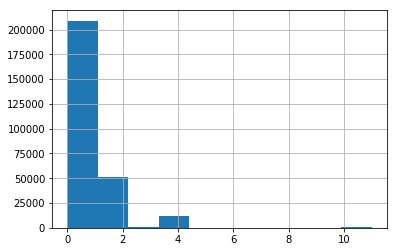

In [27]:
df['points'].hist()

In [28]:
df['points'].unique()

array([ 1,  2,  4,  0,  3, 11], dtype=int64)

#### Grade

In [29]:
df['grade'].describe()

count     272801
unique         3
top            A
freq      234707
Name: grade, dtype: object

In [30]:
df['grade'].unique()

array(['A', 'B', 'C'], dtype=object)

#### Facility Address

In [31]:
df['facility_address'].describe()

count                  272801
unique                  11320
top       1000 VIN SCULLY AVE
freq                      989
Name: facility_address, dtype: object

In [32]:
df['facility_address'].head()

0    5151 HOLLYWOOD BLVD
1    5151 HOLLYWOOD BLVD
2    5151 HOLLYWOOD BLVD
3    5151 HOLLYWOOD BLVD
4    5151 HOLLYWOOD BLVD
Name: facility_address, dtype: object

#### Facility City, ID, State, Zip

In [33]:
df[['facility_city', 'facility_id', 'facility_state', 'facility_zip']].describe()

,facility_city,facility_id,facility_state,facility_zip
count,272801,272801,272801,272801
unique,1,12729,1,938
top,LOS ANGELES,FA0019271,CA,90012
freq,272801,981,272801,10163


In [34]:
df['facility_city'].unique(), df['facility_state'].unique()

(array(['LOS ANGELES'], dtype=object), array(['CA'], dtype=object))

In [35]:
df['facility_zip'].unique()

array(['90027', '90041-2618', '90014', '90034', '90033', '90017',
       '90012-3791', '90041', '90089', '90006', '90039', '90036', '90007',
       '90020', '90064', '90037', '90047', '90003', '90028', '90032',
       '90045', '90018', '90012', '90047-3325', '90012-3902',
       '90004-2604', '90022', '90001', '90019', '90005', '90025',
       '90021-2848', '90067', '90011', '90068', '90063', '90040', '90031',
       '90022-2430', '90012-3601', '90061', '90023', '90077', '90013',
       '90042-4230', '90047-2123', '90049', '90025-6587', '90044',
       '90042', '90069', '90027-5624', '90016', '90026', '90058',
       '90042-2535', '90017-1466', '90029', '90058-2010', '90015',
       '90013-2124', '90063-1106', '90063-2520', '90003-1809',
       '90077-1724', '90046', '90038-2043', '90047-3326', '90001-1127',
       '90048-5102', '90020-2567', '90061-1400', '90048', '90066',
       '90004-3504', '90035', '90057-2915', '90057', '90010',
       '90027-6131', '90001-4155', '90071', '90032-

##### replace the hyphen in zip and transform

In [36]:
df['fzip'] = df['facility_zip'].str.replace('-','')
df['fzip'] = pd.to_numeric(df.fzip)

In [37]:
df.dtypes

serial_number                    object
activity_date            datetime64[ns]
facility_name                    object
violation_code                   object
violation_description            object
violation_status                 object
points                            int64
grade                            object
facility_address                 object
facility_city                    object
facility_id                      object
facility_state                   object
facility_zip                     object
employee_id                      object
owner_id                         object
owner_name                       object
pe_description                   object
program_element_pe                int64
program_name                     object
program_status                   object
record_id                        object
score                             int64
service_code                      int64
service_description              object
row_id                           object


#### Employee and Owner ID's

In [38]:
df['employee_id'].describe()

count        272801
unique          127
top       EE0000721
freq          18854
Name: employee_id, dtype: object

In [39]:
df['employee_id'].unique()

array(['EE0000857', 'EE0000162', 'EE0000721', 'EE0000727', 'EE0000740',
       'EE0001058', 'EE0000117', 'EE0000884', 'EE0000523', 'EE0000853',
       'EE0000800', 'EE0000846', 'EE0001003', 'EE0000338', 'EE0000707',
       'EE0001064', 'EE0001073', 'EE0000835', 'EE0000733', 'EE0000722',
       'EE0001049', 'EE0000691', 'EE0000854', 'EE0000697', 'EE0000924',
       'EE0000946', 'EE0000660', 'EE0000869', 'EE0000375', 'EE0000799',
       'EE0000871', 'EE0000557', 'EE0001004', 'EE0001026', 'EE0000246',
       'EE0000958', 'EE0000366', 'EE0000699', 'EE0000723', 'EE0000911',
       'EE0000709', 'EE0000923', 'EE0000037', 'EE0000874', 'EE0000726',
       'EE0000176', 'EE0000955', 'EE0000893', 'EE0000198', 'EE0000828',
       'EE0000684', 'EE0001048', 'EE0000424', 'EE0000957', 'EE0001025',
       'EE0000904', 'EE0000659', 'EE0000144', 'EE0000751', 'EE0000997',
       'EE0000468', 'EE0000015', 'EE0000059', 'EE0001006', 'EE0000883',
       'EE0000894', 'EE0000633', 'EE0000925', 'EE0000399', 'EE00

In [40]:
df['owner_id'].describe()

count        272801
unique        11093
top       OW0029458
freq           1481
Name: owner_id, dtype: object

In [41]:
df['owner_id'].unique()

array(['OW0001034', 'OW0033830', 'OW0017480', ..., 'OW0126811',
       'OW0033326', 'OW0018476'], dtype=object)

#### PE Description

In [42]:
df['pe_description'].describe()

count                                272801
unique                                   18
top       RESTAURANT (0-30) SEATS HIGH RISK
freq                                  69820
Name: pe_description, dtype: object

In [43]:
df['pe_description'].unique()

array(['RESTAURANT (31-60) SEATS HIGH RISK',
       'FOOD MKT RETAIL (25-1,999 SF) HIGH RISK',
       'RESTAURANT (31-60) SEATS MODERATE RISK',
       'RESTAURANT (0-30) SEATS MODERATE RISK',
       'RESTAURANT (0-30) SEATS HIGH RISK',
       'FOOD MKT RETAIL (25-1,999 SF) LOW RISK',
       'RESTAURANT (61-150) SEATS HIGH RISK',
       'FOOD MKT RETAIL (2,000+ SF) LOW RISK',
       'RESTAURANT (61-150) SEATS MODERATE RISK',
       'RESTAURANT (0-30) SEATS LOW RISK',
       'RESTAURANT (31-60) SEATS LOW RISK',
       'FOOD MKT RETAIL (2,000+ SF) HIGH RISK',
       'RESTAURANT (151 + ) SEATS HIGH RISK',
       'FOOD MKT RETAIL (25-1,999 SF) MODERATE RISK',
       'FOOD MKT RETAIL (2,000+ SF) MODERATE RISK',
       'RESTAURANT (151 + ) SEATS MODERATE RISK',
       'RESTAURANT (61-150) SEATS LOW RISK',
       'RESTAURANT (151 + ) SEATS LOW RISK'], dtype=object)

#### Program Details

In [44]:
df[['program_element_pe', 'program_name', 'program_status']].describe(include='all')

,program_element_pe,program_name,program_status
count,272801.000000,272174,272801
unique,NaN,12123,2
top,NaN,RESTAURANT,ACTIVE
freq,NaN,462,238747
mean,1630.387946,NaN,NaN
std,8.799336,NaN,NaN
min,1610.000000,NaN,NaN
25%,1631.000000,NaN,NaN
50%,1632.000000,NaN,NaN
75%,1635.000000,NaN,NaN


In [45]:
df['program_status'].unique()

array(['ACTIVE', 'INACTIVE'], dtype=object)

In [46]:
df['program_name'].unique()

array(['KRUANG TEDD', 'MEAT MARKET', 'LOS ANGELES NEW YORK PIZZA', ...,
       'PINK TACO', 'CAFE GREEN TEA', 'DWP CAFETERIA'], dtype=object)

#### Service Code & Description

In [47]:
df['service_code'].describe(include='all')

count    272801.000000
mean          7.920796
std          52.157750
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         401.000000
Name: service_code, dtype: float64

In [48]:
df['service_description'].describe()

count                 272801
unique                     2
top       ROUTINE INSPECTION
freq                  268081
Name: service_description, dtype: object

In [49]:
df['service_description'].unique()

array(['ROUTINE INSPECTION', 'OWNER INITIATED ROUTINE INSPECT.'],
      dtype=object)

#### Record ID

In [50]:
df['record_id'].describe()

count        272801
unique        13675
top       PR0170854
freq            125
Name: record_id, dtype: object

In [51]:
df['row_id'].describe()

count            272801
unique           272801
top       DAM170361F036
freq                  1
Name: row_id, dtype: object

---

In [52]:
df.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id,fzip
0,DA08R0TCU,2018-03-30,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030,90027
1,DA08R0TCU,2018-03-30,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027,90027
2,DA08R0TCU,2018-03-30,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035,90027
3,DA08R0TCU,2018-03-30,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033,90027
4,DA08R0TCU,2018-03-30,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029,90027


In [53]:
pd

<module 'pandas' from 'c:\\py37\\lib\\site-packages\\pandas\\__init__.py'>

In [54]:
# pd.Categorical(df)

In [55]:
# pd.CategoricalIndex(df)

In [56]:
pd.factorize(df['violation_description'])

(array([ 0,  1,  2, ..., 19, 16, 18], dtype=int32),
 Index(['# 30. Food properly stored; food storage containers identified',
        '# 27. Food separated and protected',
        '# 35. Equipment/Utensils - approved; installed; clean; good repair, capacity',
        '# 33. Nonfood-contact surfaces clean and in good repair',
        '# 29. Toxic substances properly identified, stored, used',
        '# 44. Floors, walls and ceilings: properly built, maintained in good repair and clean',
        '# 06. Adequate handwashing facilities supplied & accessible',
        '# 39. Wiping cloths: properly used and stored',
        '# 37. Adequate ventilation and lighting; designated areas, use',
        '# 32. Food properly labeled & honestly presented',
        '# 34. Warewashing facilities: Adequate, maintained, properly use, test strips available',
        '# 14. Food contact surfaces: clean and sanitized',
        '# 43. Premises; personal/cleaning items; vermin-proofing',
        '# 42. Toil

In [57]:
df.columns

Index(['serial_number', 'activity_date', 'facility_name', 'violation_code',
       'violation_description', 'violation_status', 'points', 'grade',
       'facility_address', 'facility_city', 'facility_id', 'facility_state',
       'facility_zip', 'employee_id', 'owner_id', 'owner_name',
       'pe_description', 'program_element_pe', 'program_name',
       'program_status', 'record_id', 'score', 'service_code',
       'service_description', 'row_id', 'fzip'],
      dtype='object')

In [58]:
df.isnull().sum()

serial_number              0
activity_date              0
facility_name              0
violation_code             0
violation_description      0
violation_status           0
points                     0
grade                      0
facility_address           0
facility_city              0
facility_id                0
facility_state             0
facility_zip               0
employee_id                0
owner_id                   0
owner_name                 0
pe_description             0
program_element_pe         0
program_name             627
program_status             0
record_id                  0
score                      0
service_code               0
service_description        0
row_id                     0
fzip                       0
dtype: int64

In [59]:
df['program_name'].isna().sum()

627

In [60]:
df_na = df[df.isnull().any(axis=1)]
df_na

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id,fzip
6110,DAKD76TDY,2018-03-08,LE GARACE CAFE,F013,"# 13. Food in good condition, safe and unadult...",OUT OF COMPLIANCE,2,A,230 N LARCHMONT BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS MODERATE RISK,1631,NaN,ACTIVE,PR0121474,93,1,ROUTINE INSPECTION,DAKD76TDYF013,90004
6111,DAKD76TDY,2018-03-08,LE GARACE CAFE,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,230 N LARCHMONT BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS MODERATE RISK,1631,NaN,ACTIVE,PR0121474,93,1,ROUTINE INSPECTION,DAKD76TDYF033,90004
6112,DAKD76TDY,2018-03-08,LE GARACE CAFE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,230 N LARCHMONT BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS MODERATE RISK,1631,NaN,ACTIVE,PR0121474,93,1,ROUTINE INSPECTION,DAKD76TDYF040,90004
6113,DAKD76TDY,2018-03-08,LE GARACE CAFE,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,230 N LARCHMONT BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS MODERATE RISK,1631,NaN,ACTIVE,PR0121474,93,1,ROUTINE INSPECTION,DAKD76TDYF030,90004
6114,DAKD76TDY,2018-03-08,LE GARACE CAFE,F036,"# 36. Equipment, utensils and linens: storage ...",OUT OF COMPLIANCE,1,A,230 N LARCHMONT BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS MODERATE RISK,1631,NaN,ACTIVE,PR0121474,93,1,ROUTINE INSPECTION,DAKD76TDYF036,90004
6115,DAKD76TDY,2018-03-08,LE GARACE CAFE,F037,# 37. Adequate ventilation and lighting; desig...,OUT OF COMPLIANCE,1,A,230 N LARCHMONT BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS MODERATE RISK,1631,NaN,ACTIVE,PR0121474,93,1,ROUTINE INSPECTION,DAKD76TDYF037,90004
14432,DA1HJ3FGA,2018-02-07,GRAND STAR,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,943 SUN MUN WAY,LOS ANGELES,...,RESTAURANT (61-150) SEATS HIGH RISK,1638,NaN,ACTIVE,PR0016262,98,1,ROUTINE INSPECTION,DA1HJ3FGAF040,90012
14433,DA1HJ3FGA,2018-02-07,GRAND STAR,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE,1,A,943 SUN MUN WAY,LOS ANGELES,...,RESTAURANT (61-150) SEATS HIGH RISK,1638,NaN,ACTIVE,PR0016262,98,1,ROUTINE INSPECTION,DA1HJ3FGAF044,90012
14649,DAE6Z0CQ8,2018-02-07,KONY PIZZERIA PUB,F052,# 01b. Food safety certification,OUT OF COMPLIANCE,2,A,3281 WILSHIRE BLVD,LOS ANGELES,...,RESTAURANT (61-150) SEATS HIGH RISK,1638,NaN,ACTIVE,PR0120969,91,401,OWNER INITIATED ROUTINE INSPECT.,DAE6Z0CQ8F052,90010
14650,DAE6Z0CQ8,2018-02-07,KONY PIZZERIA PUB,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,3281 WILSHIRE BLVD,LOS ANGELES,...,RESTAURANT (61-150) SEATS HIGH RISK,1638,NaN,ACTIVE,PR0120969,91,401,OWNER INITIATED ROUTINE INSPECT.,DAE6Z0CQ8F040,90010


In [61]:
df[df.isnull().any(axis=1)].corr()

,points,program_element_pe,score,service_code,fzip
points,1.000000,0.046114,-0.173454,0.028194,0.094873
program_element_pe,0.046114,1.000000,-0.029794,-0.028750,0.269846
score,-0.173454,-0.029794,1.000000,0.035753,-0.107051
service_code,0.028194,-0.028750,0.035753,1.000000,0.150785
fzip,0.094873,0.269846,-0.107051,0.150785,1.000000


In [62]:
len(set(list(df['program_name'].unique())))

12124

In [63]:
list(df['program_name'].unique())

['KRUANG TEDD',
 'MEAT MARKET',
 'LOS ANGELES NEW YORK PIZZA',
 'THE BAGEL FACTORY',
 'CREPE EXPRESS',
 'LA LUNA RESTAURANT',
 'TARGET',
 'KAISH',
 "TRADER JOE'S #55",
 'SPROUTS FARMERS MARKET#403',
 'KOBUNGA KOREAN GRILL',
 'K&A CATON CHINESE REST.',
 'MI RANCHITO',
 'MCDONALDS #4589',
 'DEL ACO #162',
 'FIX CAFE',
 'C & M CAFE',
 'JUICE N FRUIT',
 "YOUNG'S LOBBY SHOP",
 'DELI',
 'D-TOWN BURGER BAR',
 "ONE'S LIQUOR",
 'SILOM SUPER MARKET',
 'LA PERGOLETTO DELI',
 'O JANG DONG RESTAURANT',
 "PARU'S INDIAN RESTAURANT",
 'MADAME MONSIEUR',
 'TARGET - STARBUCKS',
 'RALPHS MARKET DELI',
 'CAFE DELI E PARK CENTRAL BLD',
 'SUSHI AI',
 'DARABAR SECRET THAI CUISINE',
 "FERNANDO'S MINI MARKET",
 'WAHLBURGERS',
 'SHOP RITE BROTHERS',
 'KS MARKET',
 'L.A. MINI MARKET',
 'NORTHGATE TORTILLERIA',
 'VISTA DEL MAR FOOD SERVICE A',
 'OHM NIGHT CLUB',
 'MARISCOS EL KORA LE NAYARIT',
 'ISKCON KRISHNA TEMPLE',
 'PIZZA HUT',
 'LOUISIANA FRIED CHICKEN',
 'TORUNG THAI CUISINE',
 'SEOUL SAUSAGE',
 'HECHO EN 

In [64]:
627/len(df) * 100

0.22983786716324353

###### only 0.23% of rows have missing values in column 'program_name'

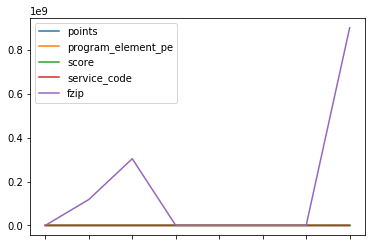

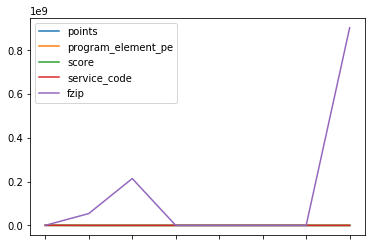

In [65]:
df_na.describe().plot()
df.describe().plot()

In [66]:
df_na.unstack().shape

(16302,)

In [67]:
df['program_element_pe'].unique()

array([1635, 1612, 1634, 1631, 1632, 1610, 1638, 1613, 1637, 1630, 1633,
       1615, 1641, 1611, 1614, 1640, 1636, 1639], dtype=int64)

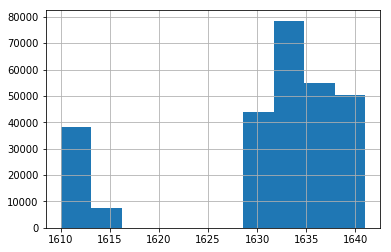

In [68]:
df['program_element_pe'].hist()

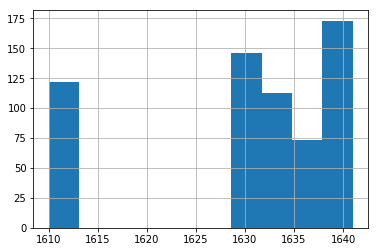

In [69]:
df_na['program_element_pe'].hist()

In [70]:
df['program_name'].fillna('Unknown', inplace=True)

In [71]:
df.isnull().sum()

serial_number            0
activity_date            0
facility_name            0
violation_code           0
violation_description    0
violation_status         0
points                   0
grade                    0
facility_address         0
facility_city            0
facility_id              0
facility_state           0
facility_zip             0
employee_id              0
owner_id                 0
owner_name               0
pe_description           0
program_element_pe       0
program_name             0
program_status           0
record_id                0
score                    0
service_code             0
service_description      0
row_id                   0
fzip                     0
dtype: int64

In [72]:
df.tail()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id,fzip
272796,DAZZXBLXG,2015-10-01,LA CIENEGA KABOB HOUSE,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE,2,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF023,90048
272797,DAZZXBLXG,2015-10-01,LA CIENEGA KABOB HOUSE,F006,# 06. Adequate handwashing facilities supplied...,OUT OF COMPLIANCE,2,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF006,90048
272798,DAZZXBLXG,2015-10-01,LA CIENEGA KABOB HOUSE,F040,"# 40. Plumbing: Plumbing in good repair, prope...",OUT OF COMPLIANCE,1,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF040,90048
272799,DAZZXBLXG,2015-10-01,LA CIENEGA KABOB HOUSE,F036,"# 36. Equipment, utensils and linens: storage ...",OUT OF COMPLIANCE,1,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF036,90048
272800,DAZZXBLXG,2015-10-01,LA CIENEGA KABOB HOUSE,F048,# 47. Permits Available,OUT OF COMPLIANCE,1,A,444 1/2 N LA CIENEGA BLVD,LOS ANGELES,...,RESTAURANT (0-30) SEATS HIGH RISK,1632,LA CIENEGA KABOB HOUSE,INACTIVE,PR0032514,92,1,ROUTINE INSPECTION,DAZZXBLXGF048,90048


In [73]:
cols = list(df.columns)
cols

['serial_number',
 'activity_date',
 'facility_name',
 'violation_code',
 'violation_description',
 'violation_status',
 'points',
 'grade',
 'facility_address',
 'facility_city',
 'facility_id',
 'facility_state',
 'facility_zip',
 'employee_id',
 'owner_id',
 'owner_name',
 'pe_description',
 'program_element_pe',
 'program_name',
 'program_status',
 'record_id',
 'score',
 'service_code',
 'service_description',
 'row_id',
 'fzip']

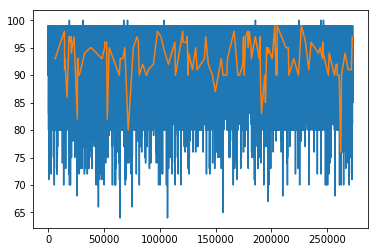

In [74]:
df['score'].plot()
df_na['score'].plot()

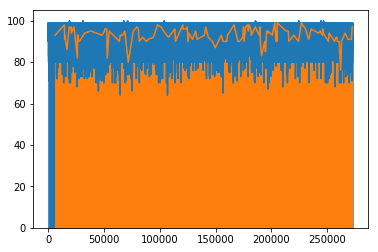

In [75]:
df['score'].plot.area()
df_na['score'].plot.area()

In [76]:
num_cols = df.describe()
num_cols = list(num_cols.columns)
num_cols

['points', 'program_element_pe', 'score', 'service_code', 'fzip']

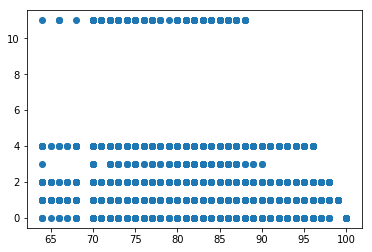

In [77]:
plt.scatter(df['score'], df['points'])

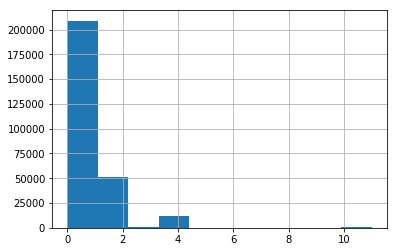

In [78]:
df['points'].hist()

In [79]:
correlations = df.corr()
correlations

,points,program_element_pe,score,service_code,fzip
points,1.000000,0.020194,-0.182256,0.005760,0.004537
program_element_pe,0.020194,1.000000,-0.117510,0.050788,-0.013702
score,-0.182256,-0.117510,1.000000,0.000675,0.001233
service_code,0.005760,0.050788,0.000675,1.000000,-0.012054
fzip,0.004537,-0.013702,0.001233,-0.012054,1.000000


In [80]:
# setup mask
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

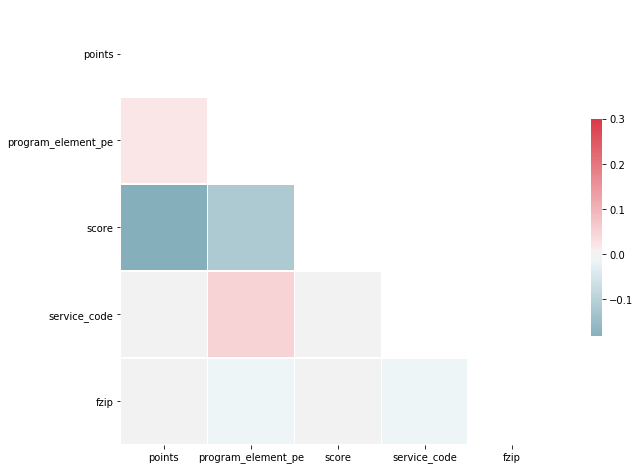

In [81]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [82]:
sns.set(style="ticks", color_codes=True)

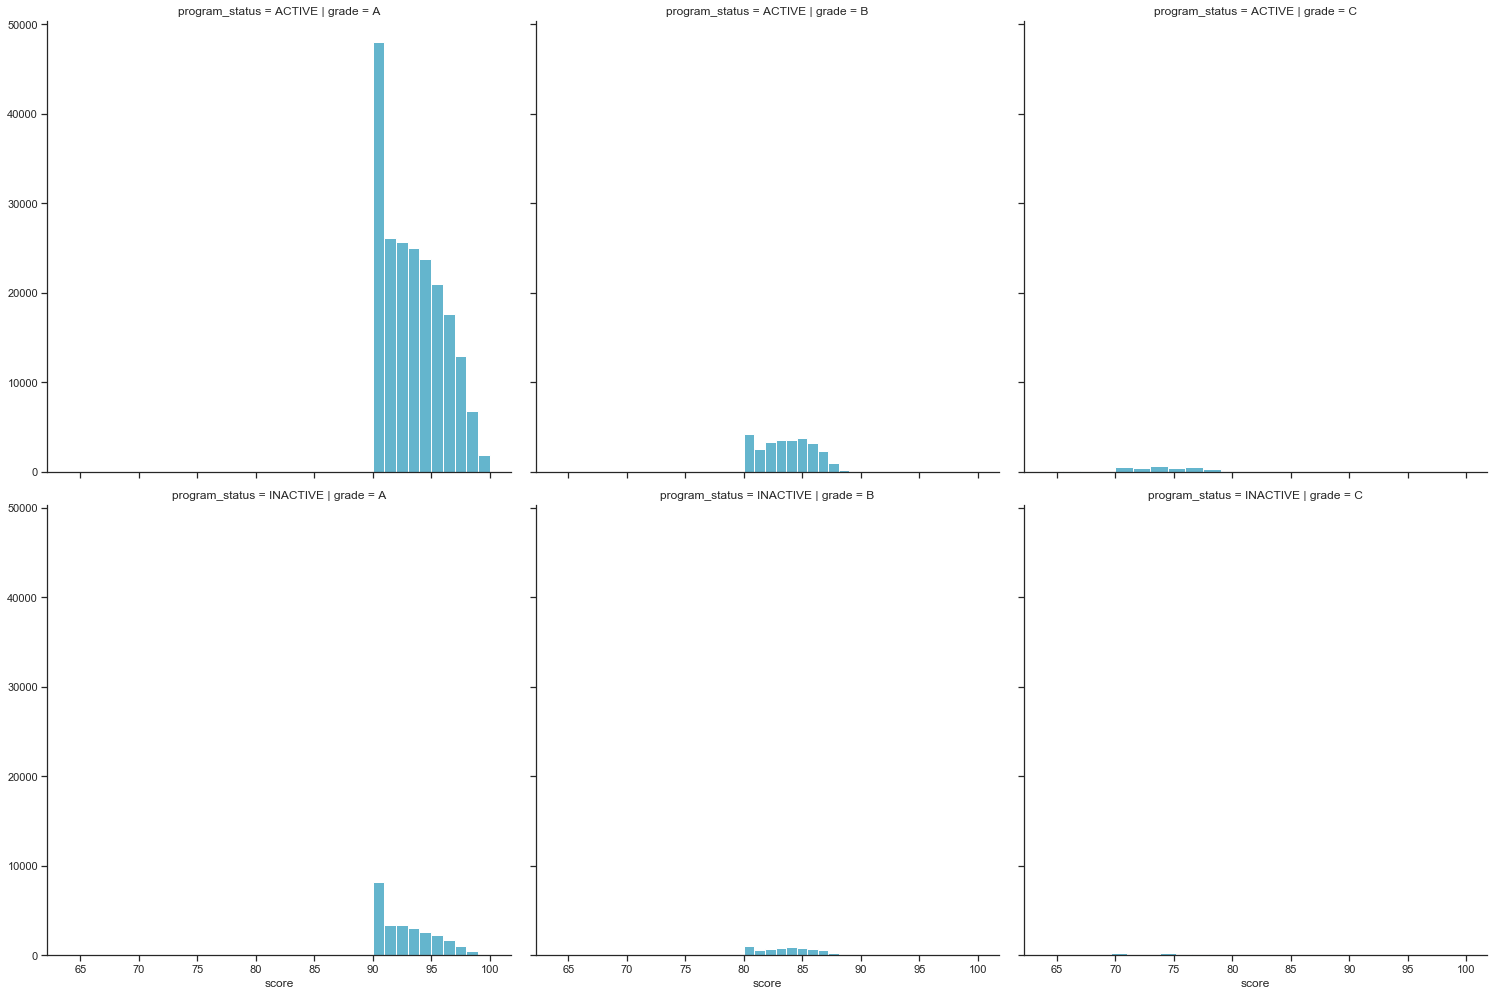

In [83]:
g = sns.FacetGrid(df, col='grade',  row='program_status', height=7,)
g = g.map(plt.hist, 'score', color='c', edgecolor='w')

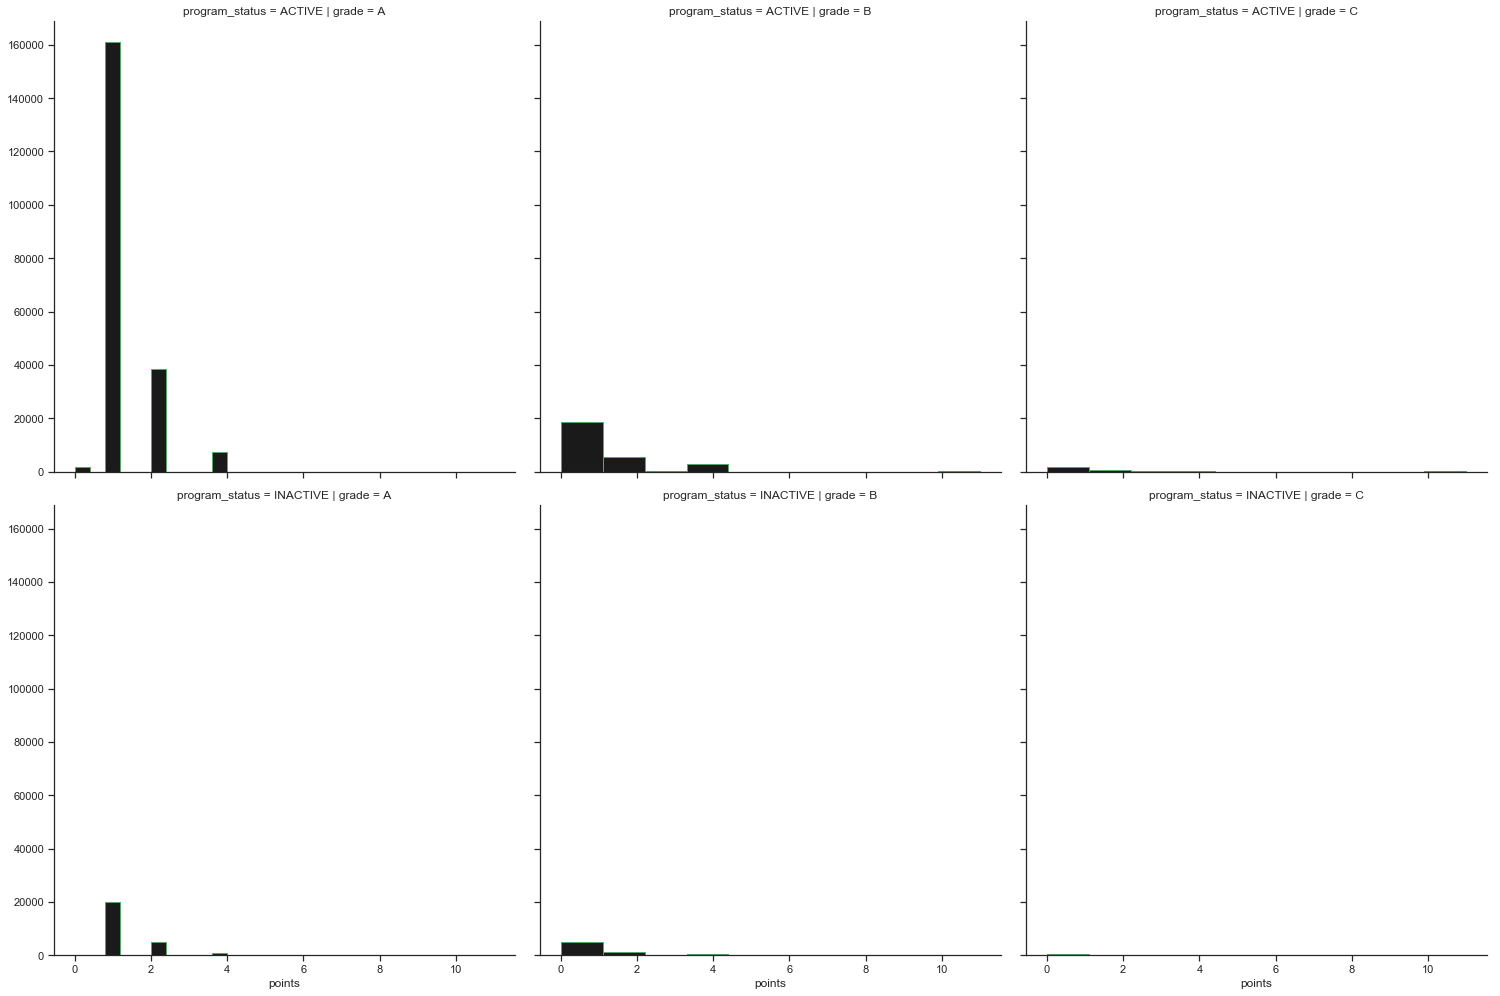

In [84]:
g = sns.FacetGrid(df, col='grade',  row='program_status', height=7,)
g = g.map(plt.hist, 'points', color='k', edgecolor='g')

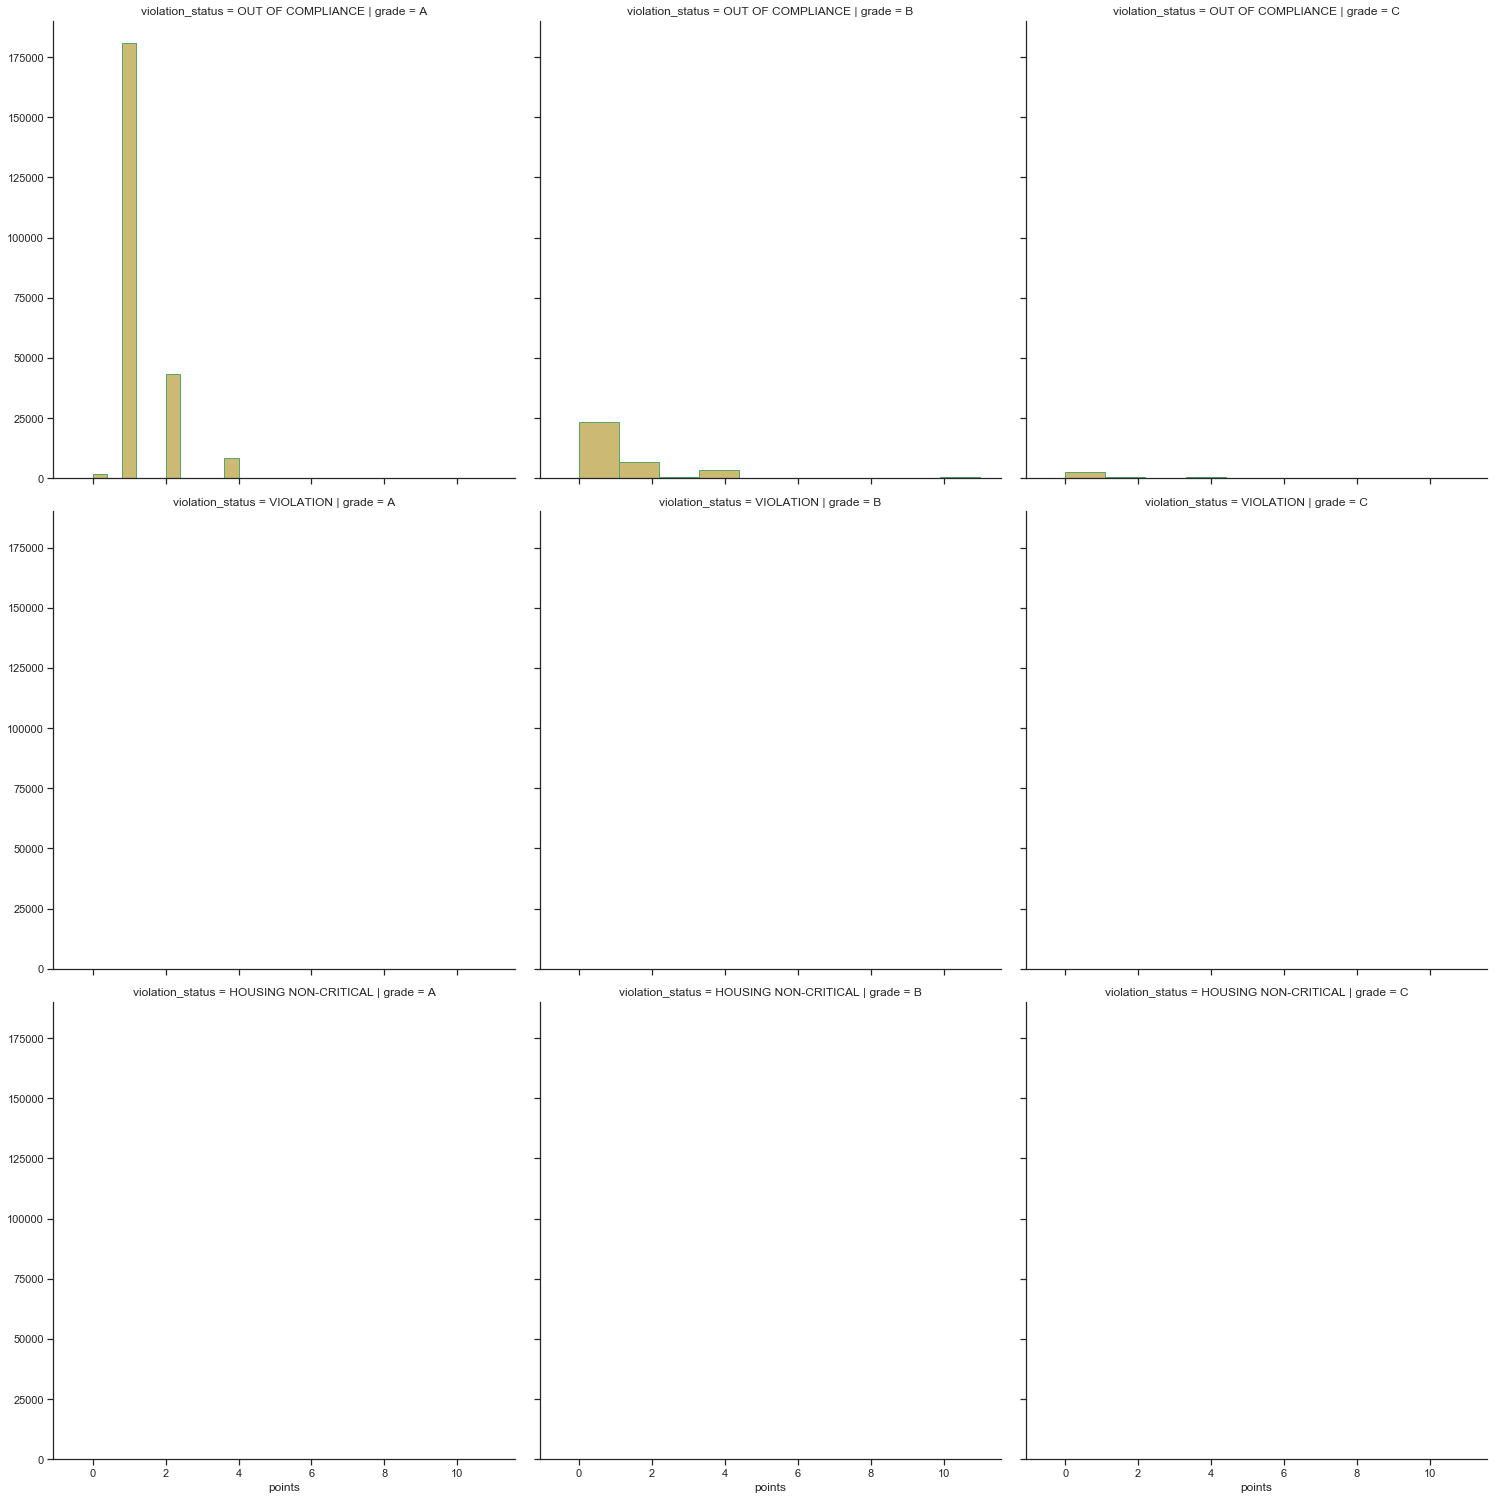

In [85]:
g = sns.FacetGrid(df, col='grade',  row='violation_status', height=7,)
g = g.map(plt.hist, 'points', color='y', edgecolor='g')

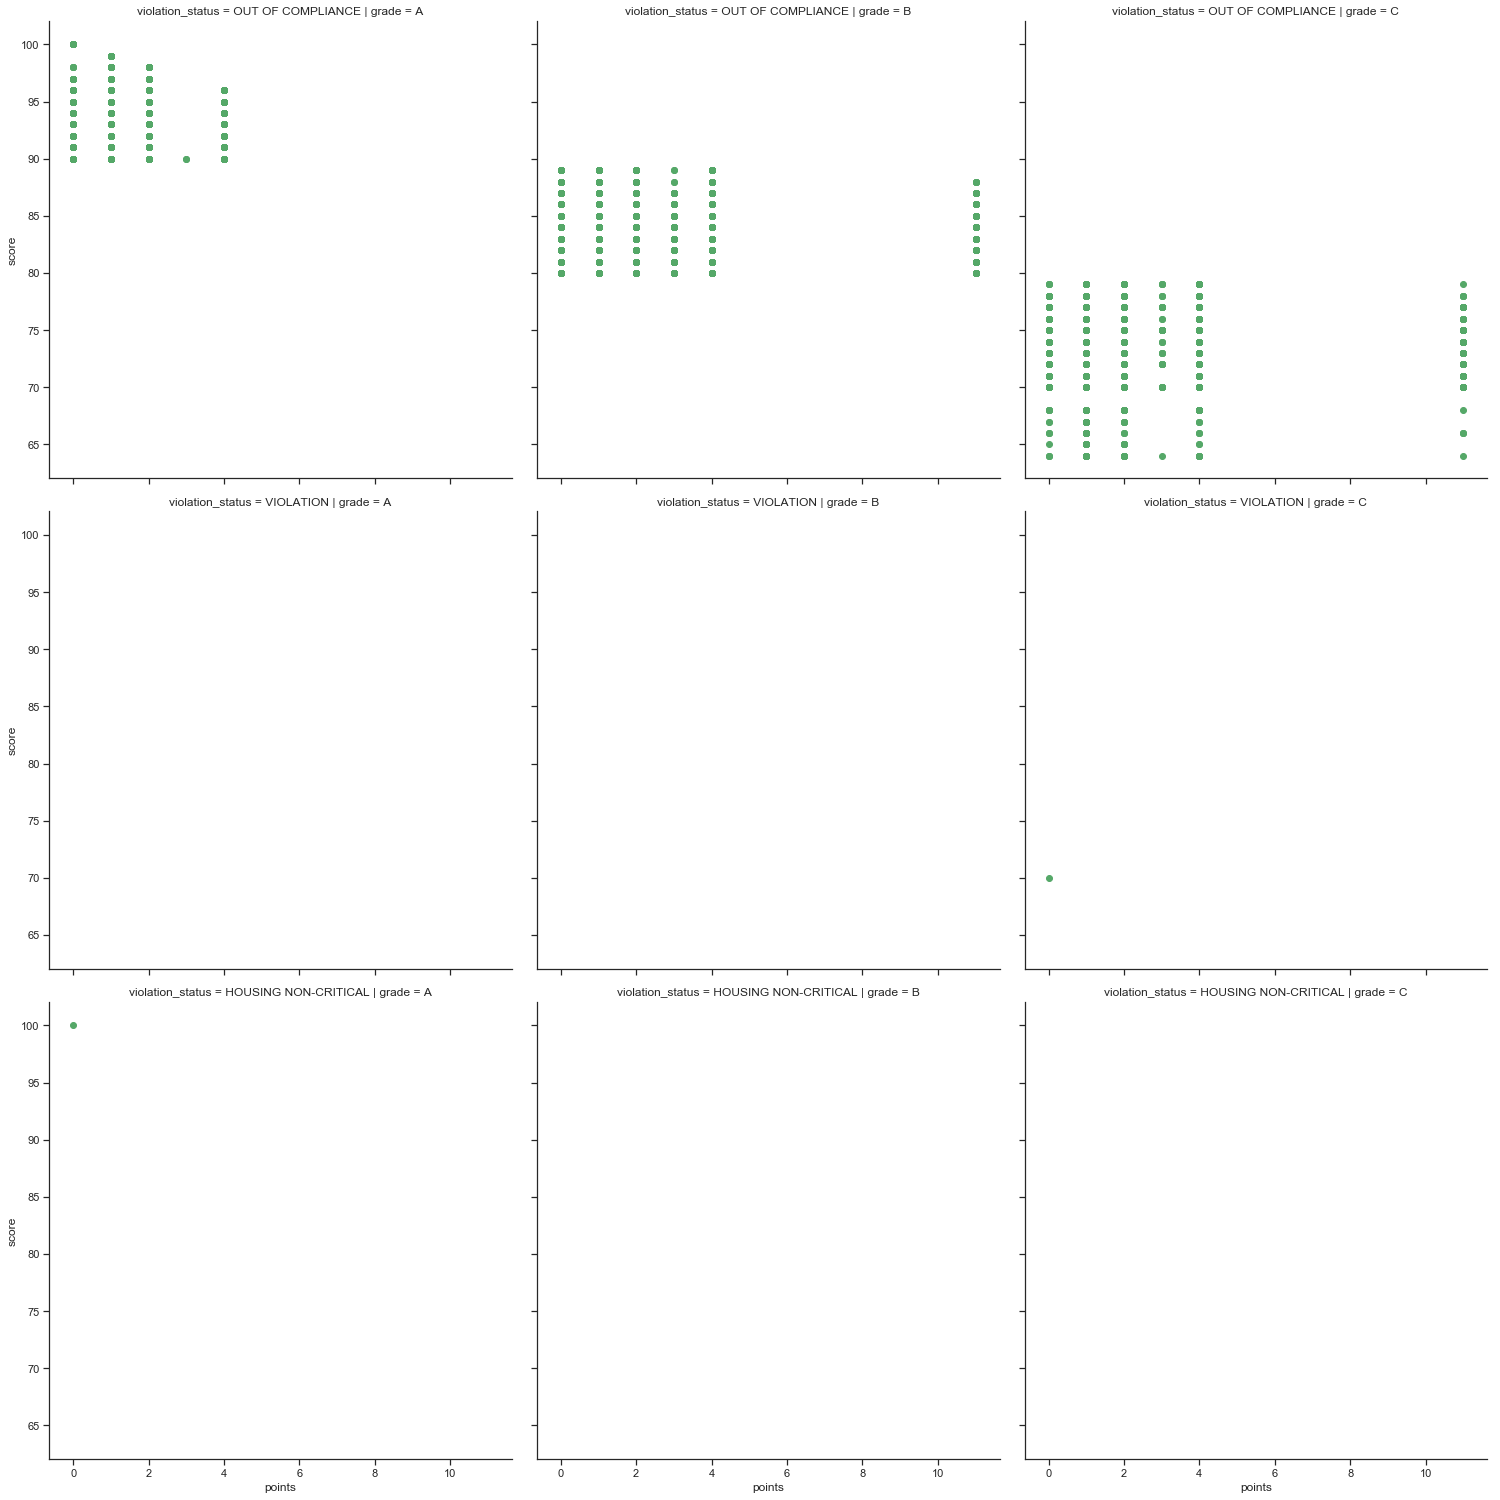

In [86]:
g = sns.FacetGrid(df, col='grade',  row='violation_status', height=7,)
g = g.map(plt.scatter, 'points', 'score', color='g', edgecolor='g')

##### Out of Compliance and Grade seems to be a good classifier!

In [87]:
df[df.points == 11].describe()

,points,program_element_pe,score,service_code,fzip
count,432.0,432.000000,432.000000,432.000000,4.320000e+02
mean,11.0,1630.090278,80.722222,9.333333,8.344045e+07
std,0.0,9.279556,4.610255,57.196693,2.612306e+08
min,11.0,1610.000000,64.000000,1.000000,9.000100e+04
25%,11.0,1631.000000,80.000000,1.000000,9.001900e+04
50%,11.0,1632.000000,82.000000,1.000000,9.002900e+04
75%,11.0,1635.000000,84.000000,1.000000,9.004900e+04
max,11.0,1641.000000,88.000000,401.000000,9.006331e+08


### Feature Selection

In [88]:
cols, num_cols

(['serial_number',
  'activity_date',
  'facility_name',
  'violation_code',
  'violation_description',
  'violation_status',
  'points',
  'grade',
  'facility_address',
  'facility_city',
  'facility_id',
  'facility_state',
  'facility_zip',
  'employee_id',
  'owner_id',
  'owner_name',
  'pe_description',
  'program_element_pe',
  'program_name',
  'program_status',
  'record_id',
  'score',
  'service_code',
  'service_description',
  'row_id',
  'fzip'],
 ['points', 'program_element_pe', 'score', 'service_code', 'fzip'])

In [89]:
features_list = ['violation_status', 'points', 'score', 'program_status','program_element_pe',]
target_list = ['grade']

In [90]:
len(features_list)

5

In [91]:
X = pd.get_dummies(df[features_list])
X.shape

(272801, 8)

In [92]:
X

,points,score,program_element_pe,violation_status_HOUSING NON-CRITICAL,violation_status_OUT OF COMPLIANCE,violation_status_VIOLATION,program_status_ACTIVE,program_status_INACTIVE
0,1,92,1635,0,1,0,1,0
1,1,92,1635,0,1,0,1,0
2,1,92,1635,0,1,0,1,0
3,1,92,1635,0,1,0,1,0
4,1,92,1635,0,1,0,1,0
5,1,92,1635,0,1,0,1,0
6,2,92,1635,0,1,0,1,0
7,1,97,1612,0,1,0,1,0
8,1,97,1612,0,1,0,1,0
9,1,97,1612,0,1,0,1,0


In [93]:
import gc
gc.collect()

55

In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [95]:
pca = PCA(n_components=2)
pca

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [96]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
features = pca.fit_transform(X)
features

array([[-4.5534806 , -0.91422075],
       [-4.5534806 , -0.91422075],
       [-4.5534806 , -0.91422075],
       ...,
       [-1.56488466, -0.65730273],
       [-1.56488466, -0.65730273],
       [-1.56488466, -0.65730273]])

In [98]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

In [99]:
features.shape

(272801, 2)

In [100]:
le = LabelEncoder()
le

LabelEncoder()

In [101]:
le.fit(df['grade'].values)

LabelEncoder()

In [102]:
target = le.transform(df['grade'].values)
target

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [103]:
set(list(target))

{0, 1, 2}

---

In [104]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.23, random_state=11)

In [105]:
X_train.shape, X_test.shape

((210056, 2), (62745, 2))

In [106]:
y_train.shape, y_test.shape

((210056,), (62745,))

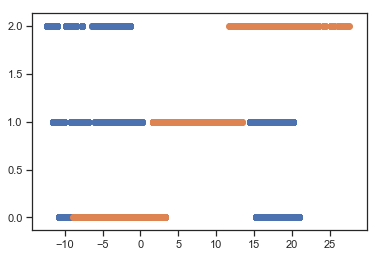

In [107]:
plt.scatter(features[:,0], target)
plt.scatter(features[:,1], target)

c:\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


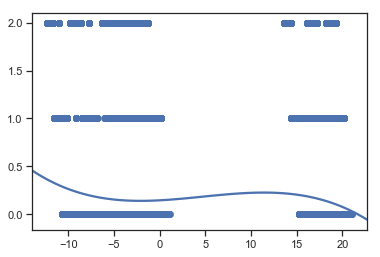

In [108]:
sns.regplot(features[:,0], target, order=3)

c:\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


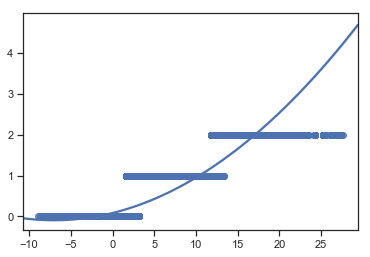

In [109]:
sns.regplot(features[:,1], target, order=2)

In [110]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [111]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
model.intercept_

0.1532065641031865

In [113]:
model.coef_

array([-0.00314483,  0.07450415])

In [114]:
y_prediction = model.predict(X_test)
y_prediction

array([ 0.25937891,  0.84409583,  0.53773191, ..., -0.05323424,
       -0.41337371,  0.03626614])

In [115]:
model.score(X_test, y_test)


0.703573129013113

In [116]:
from sklearn.metrics import r2_score, confusion_matrix

In [117]:
r2_score(y_test, y_prediction)


0.703573129013113

---

In [118]:
model = LogisticRegression()
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [119]:
%time model.fit(X_train, y_train)

Wall time: 1.16 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [120]:
model.intercept_

array([ 18.75962353,  -3.2452328 , -25.20421969])

In [121]:
model.coef_

array([[ 0.62684052, -8.20214784],
       [-0.03242976,  0.53182583],
       [-0.12336411,  1.90853044]])

In [122]:
y_prediction = model.predict(X_test)
y_prediction

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [123]:
conf_matrix = confusion_matrix(y_test, y_prediction)
conf_matrix

array([[53957,     0,     0],
       [   41,  7890,     0],
       [    0,   255,   602]], dtype=int64)

In [124]:
conf_matrix.shape

(3, 3)

In [125]:
list(conf_matrix)

[array([53957,     0,     0], dtype=int64),
 array([  41, 7890,    0], dtype=int64),
 array([  0, 255, 602], dtype=int64)]

In [126]:
# df.grade.isin(['A','B','C'])

In [127]:
model.classes_

array([0, 1, 2], dtype=int32)

In [128]:
from sklearn.metrics import classification_report

In [129]:
classification_report(y_test, y_prediction)

'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00     53957\n          1       0.97      0.99      0.98      7931\n          2       1.00      0.70      0.83       857\n\navg / total       1.00      1.00      0.99     62745\n'

#### 			     | precision  |  recall  | f1-score  | support |<br/>
----------------------------------------------------------        
##### 0 			|      1.00       |    1.00  |     1.00  |   53957 |<br/>          
##### 1  			|      0.97       |    0.99  |     0.98  |    7931 |<br/>          
##### 2  			|      1.00       |    0.70  |     0.83  |     857 |<br/><br/>

#### avg/total |      1.00    |    1.00  |     0.99  |   62745 |<br/>

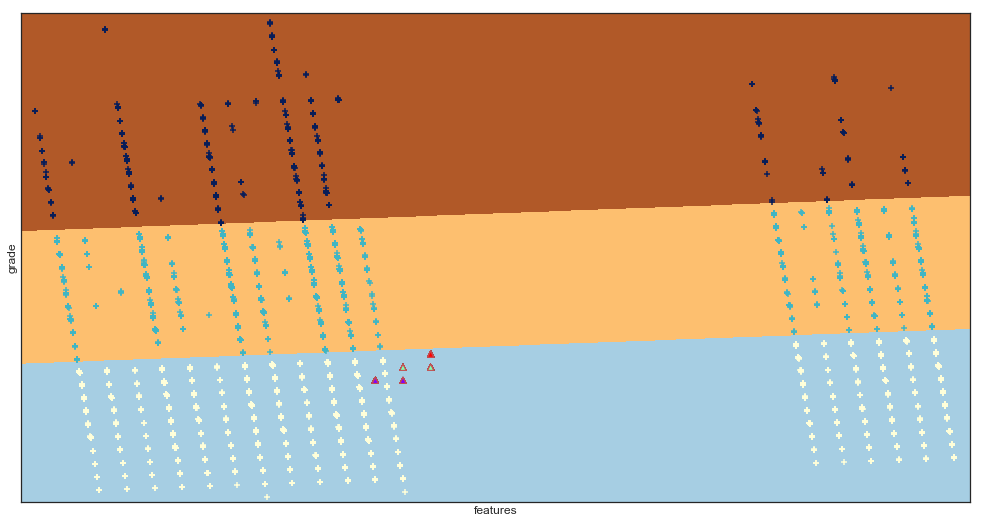

In [130]:
logreg = LogisticRegression(C=1e5)

h = .02  # step size in the mesh

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(17, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='+', edgecolors='k', cmap=plt.cm.YlGnBu)
plt.scatter(y_test, y_prediction, c=y_prediction, marker='^', edgecolors='r', cmap=plt.cm.rainbow)
plt.xlabel('features')
plt.ylabel('grade')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [131]:
import gc
gc.collect()

1434

---